# Linear Algebra and Machine Learning - Assignment - 1

* To smooth or remove the noise from the given time series data (google stock price of 9 years).
* I have used various ways to do it, with optmizations to increase the performance

In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_google = pd.read_csv("/content/drive/MyDrive/GOOG.csv")
df_google.head()

,date,open,high,low,close,volume
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000


In [5]:
df_google.info() # check the data types in google csv dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2360 non-null   object 
 1   open    2360 non-null   float64
 2   high    2360 non-null   float64
 3   low     2360 non-null   float64
 4   close   2360 non-null   float64
 5   volume  2360 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.8+ KB


In [6]:
df_google.dtypes # short - check the data types in google csv dataframe

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [7]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d')
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2360 non-null   datetime64[ns]
 1   open    2360 non-null   float64       
 2   high    2360 non-null   float64       
 3   low     2360 non-null   float64       
 4   close   2360 non-null   float64       
 5   volume  2360 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 110.8 KB


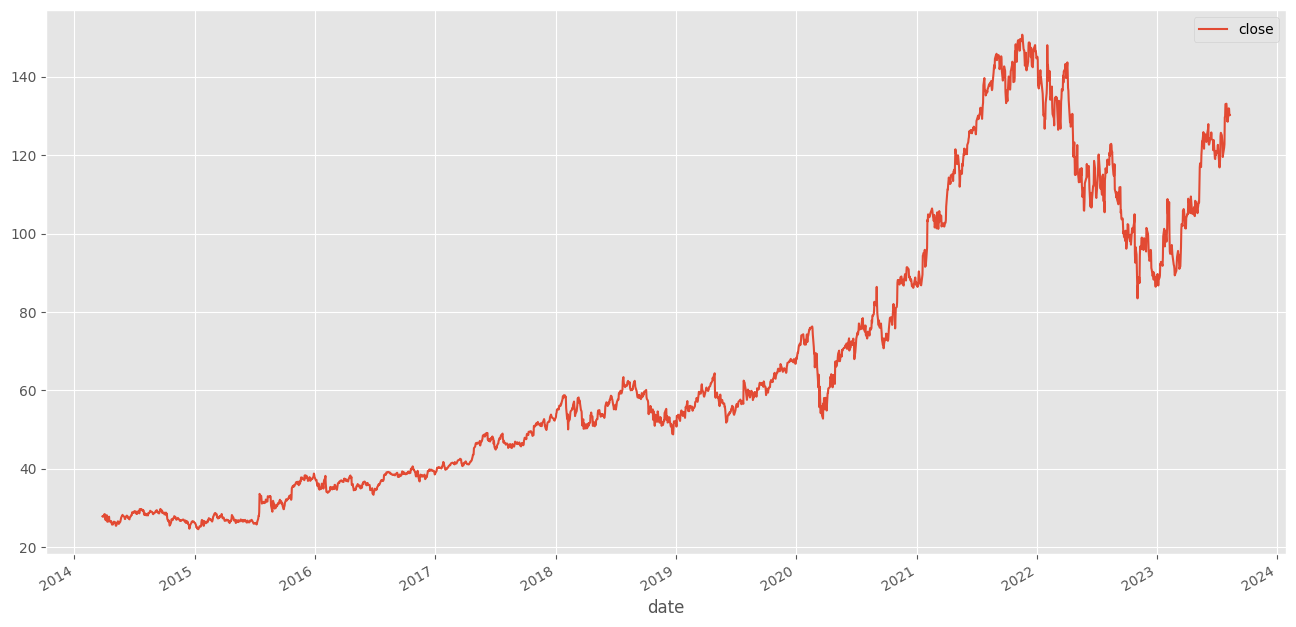

In [8]:
style.use("ggplot")
df_google.plot(x="date", y="close", figsize=(16,8))
plt.show()

In [12]:
%%timeit
arr = df_google["close"].to_numpy()
window_size = 100
moving_averages = np.zeros(len(arr))
fill_length = len(arr) - (window_size - 1)
moving_averages[0:fill_length] = \
    [np.round(np.sum(arr[i:i+window_size]) / window_size, 2) for i in np.arange(fill_length)]
moving_averages[fill_length:len(arr)] = np.repeat(moving_averages[fill_length-1], window_size - 1)
df_google["close_trend"] = moving_averages

The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
78.6 ms ± 39.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


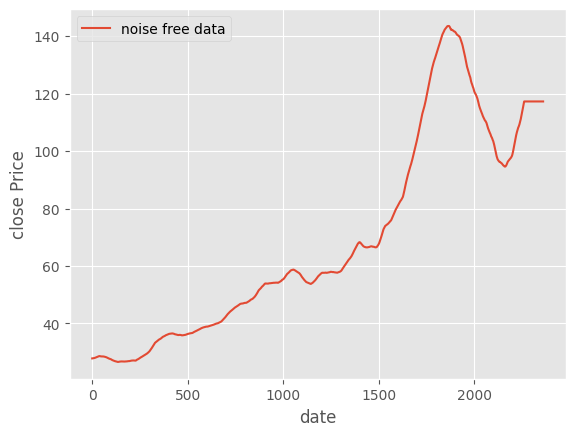

In [13]:
plt.plot(df_google["close_trend"], label='noise free data')
plt.xlabel('date')
plt.ylabel('close Price')
plt.legend()
plt.show()

In [20]:
%%timeit
window_size = 100
arr = df_google["close"].to_numpy()
fill_length = len(arr) - (window_size - 1)

rolling_window = np.lib.stride_tricks.sliding_window_view(arr, window_size)
moving_averages = np.mean(rolling_window, axis=1)
append_vals = np.repeat(moving_averages[fill_length-1], window_size - 1)
moving_averages = np.append(moving_averages, append_vals)
df_google["close_trend2"] = moving_averages

343 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


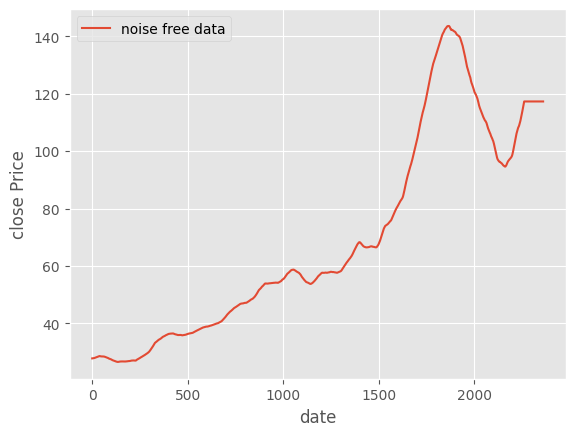

In [18]:
plt.plot(df_google["close_trend2"], label='noise free data')
plt.xlabel('date')
plt.ylabel('close Price')
plt.legend()
plt.show()

In [14]:
%%timeit
df_google['close1'] = df_google['close'].ewm(alpha=0.055).mean()

383 µs ± 58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


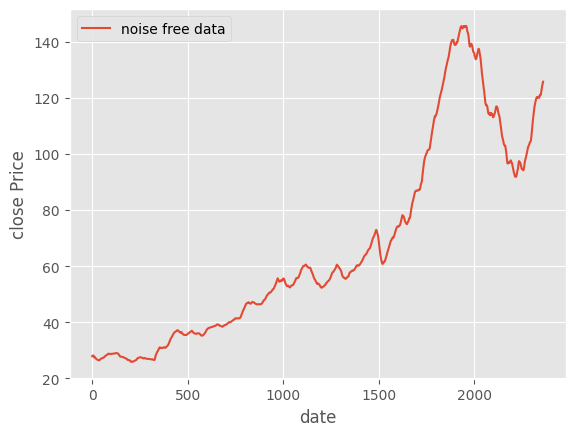

In [15]:
plt.plot(df_google['close1'], label='noise free data')
plt.xlabel('date')
plt.ylabel('close Price')
plt.legend()
plt.show()